# Introduction

The objective is to classify obesity. 

## Abbreviations
- FAVC: Frequency consumption of high caloric foods
- FCVC: Frequency consumption of vegetables
- NCP: Number of main meals
- CAEC: Consumption of foods between meals
- CH20: Consumption of water daily
- CALC: Consumption of alcohol
- SCC: Calories consumption monitoring
- FAF: Physical activity frequency
- TUE: Time using technology devices
- MTRANS: Transportion used

## About the data
The data consists of the estimation of obesity levels in people from Mexico, Peru, and Colombia, with ages between 14 and 61, with a range of eating habits and physical conditions. There are 17 attributes, and 2111 records. 

The weight is measured in kilograms, the height is measured in meters.

- Underweight: Less than 18.5
- Normal: 18.5 to 24.9
- Overweight: 25.0 to 29.9
- Obesity I: 30.0 to 34.9
- Obesity II: 35.0 to 39.9
- Obesity III: Higher than 40

In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Import the data

In [11]:
data_folder = 'C:/Users/B00830189/OneDrive - Ulster University/Projects/machine_learning_projects/Kaggle/Comps/Multi-Class Prediction of Obesity Risk/Data/'

In [13]:
df_train = pd.read_csv(data_folder + 'train.csv')
df_test = pd.read_csv(data_folder + 'test.csv')

In [14]:
# Now I will take a look at the shape of the data
print(f'The train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The train dataset has 20758 rows and 18 columns
The test dataset has 13840 rows and 17 columns


In [15]:
df_train.describe().to_csv('train_describe.csv')

In [25]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [26]:
# is there any missing data?
missing = df_train.isnull().sum()
missing

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [27]:
# Is there duplicated data?
duplicated = df_train.duplicated().sum()
duplicated

0

Now we will dig into the data a bit.

In [16]:
display('Train:', df_train.head())
display('Test:', df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


So, in the training data we can say that there is no missing or duplicated data.

# EDA

Our target variable is `NObeyesdad`, the body mass index.

In [99]:
class_colours = ['#9b5fe0', '#16a4d8', '#60dbe8', '#8bd346', '#efdf48', '#f9a52c', '#d64e12']

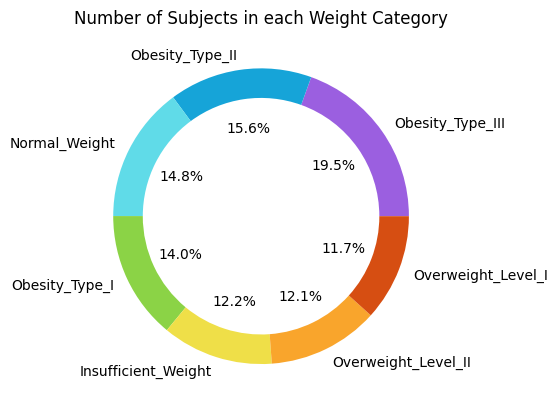

In [109]:

labels = df_train['NObeyesdad'].value_counts()
labels_index = labels.index
labels_values = labels.values
plt.pie(labels_values, labels=labels_index, autopct='%1.1f%%',wedgeprops=dict(width=0.2), colors=class_colours)
plt.title('Number of Subjects in each Weight Category')
plt.show()

In [101]:
labels.index

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'],
      dtype='object', name='NObeyesdad')

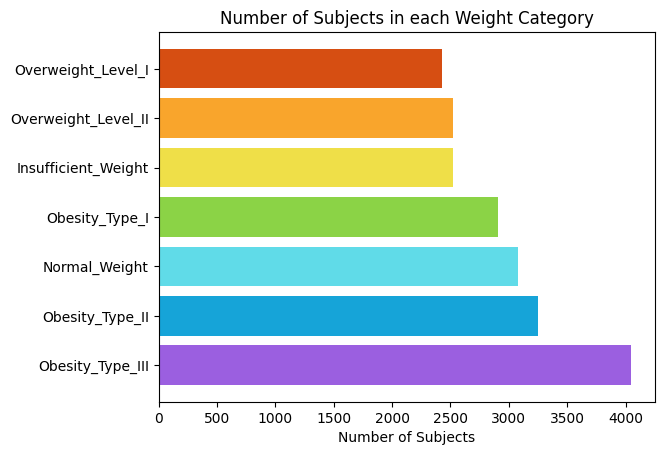

In [102]:
# Create a color array with the same length as labels
# colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

plt.barh(labels.index, labels.values, color=class_colours)
plt.title('Number of Subjects in each Weight Category')
plt.xlabel('Number of Subjects')
plt.show()

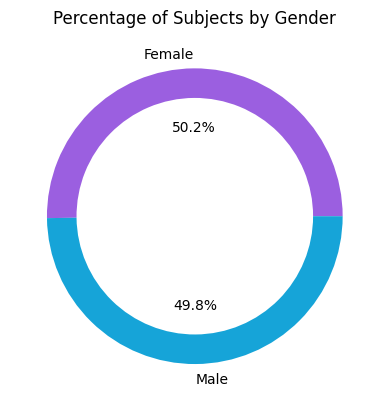

In [115]:
# What is the gender distribution in the dataset?
# gender_colours = ['#9b5fe0', '#16a4d8']
gender_labels = df_train['Gender'].value_counts()
gender_labels_index = gender_labels.index
gender_labels_values = gender_labels.values
plt.pie(gender_labels.values, labels=gender_labels_index, autopct='%1.1f%%',wedgeprops=dict(width=0.2),colors=class_colours)
plt.title('Percentage of Subjects by Gender')
plt.show()

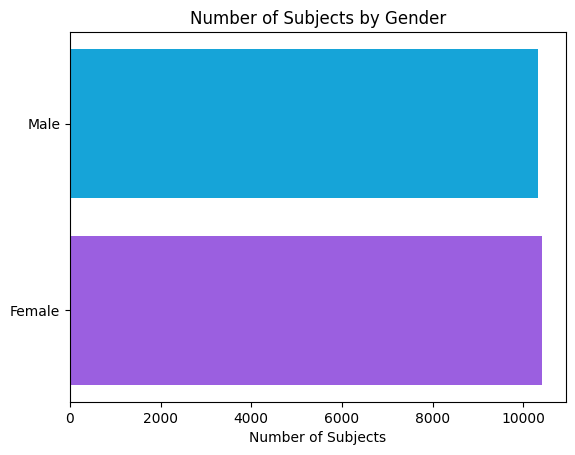

In [134]:
# gender_colours = ['green','magenta']
plt.barh(gender_labels.index, gender_labels.values, color=class_colours)
plt.title('Number of Subjects by Gender')
plt.xlabel('Number of Subjects')
plt.show()

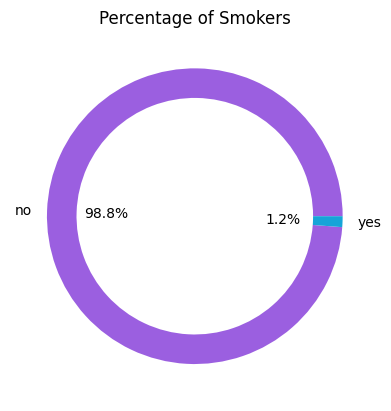

In [133]:
# What is the smokers distribution in the dataset?
smoke_labels = df_train['SMOKE'].value_counts()
smoke_labels_index = smoke_labels.index
smoke_labels_values = smoke_labels.values
plt.pie(smoke_labels.values, labels=smoke_labels_index, autopct='%1.1f%%',wedgeprops=dict(width=0.2),colors=class_colours)
plt.title('Percentage of Smokers')
plt.show()

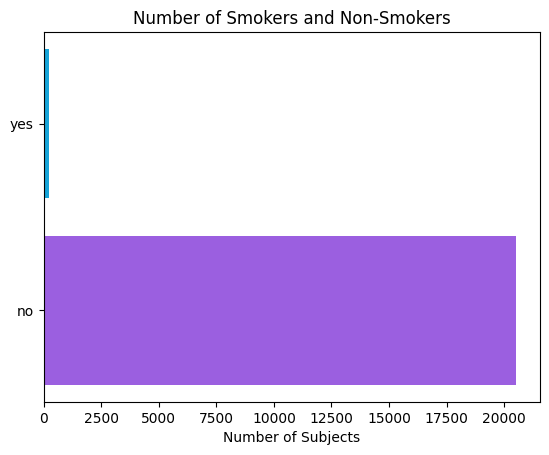

In [135]:
plt.barh(smoke_labels.index, smoke_labels.values, color=class_colours)
plt.title('Number of Smokers and Non-Smokers')
plt.xlabel('Number of Subjects')
plt.show()

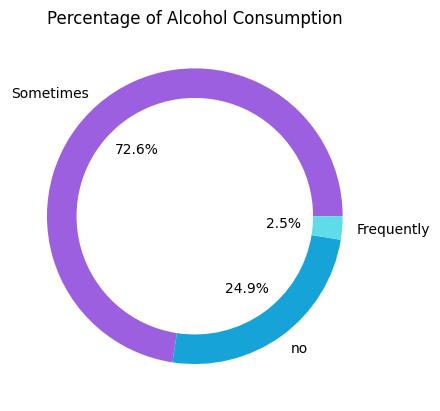

In [139]:
# Percentage of people who consume alcohol. This has three categories: sometimes, no, and frequently
alcohol_labels = df_train['CALC'].value_counts()
plt.pie(alcohol_labels.values, labels=alcohol_labels.index, autopct='%1.1f%%',wedgeprops=dict(width=0.2),colors=class_colours)
plt.title('Percentage of Alcohol Consumption')
plt.show()

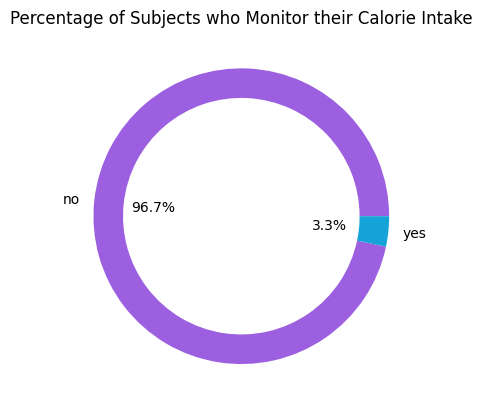

In [137]:
# Now we will look at those who do, and don't monitor their carlorie intake
monitor_labels = df_train['SCC'].value_counts()
plt.pie(monitor_labels.values, labels=monitor_labels.index, autopct='%1.1f%%',wedgeprops=dict(width=0.2),colors=class_colours)
plt.title('Percentage of Subjects who Monitor their Calorie Intake')
plt.show()

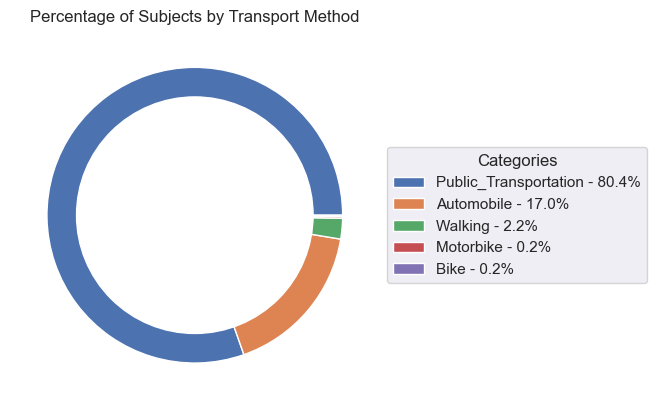

In [194]:
transport_labels = df_train['MTRANS'].value_counts()

# Set the style and color palette
sns.set_style("dark")
colors = sns.color_palette('deep')[0:5]

labels = transport_labels.index
sizes = transport_labels.values

wedges, texts = plt.pie(sizes, colors=colors)
# wedges, text_labels, autotexts  = plt.pie(transport_labels.values, labels=transport_labels.index, colors=class_colours, autopct='%1.1f%%')

# Calculate the percentages
percentages = [f'{100 * size / sum(sizes):.1f}%' for size in sizes]

# Create a new list of labels that includes the percentages
legend_labels = [f'{l} - {p}' for l, p in zip(labels, percentages)]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Transportion Methods used by Subjects')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Subjects by Transport Method')
plt.show()

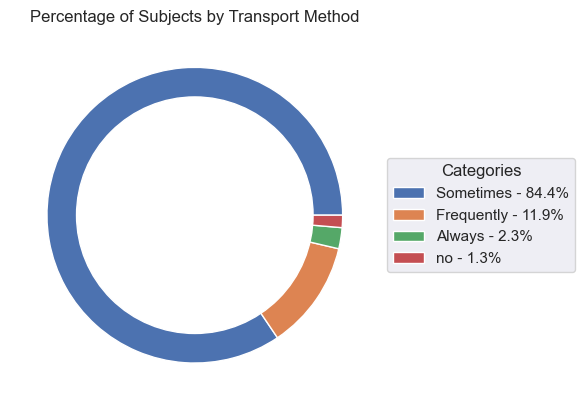

In [195]:
# Percentage of people who consume high calorie foods
high_colorie_labels = df_train['CAEC'].value_counts()

# Set the style and color palette
sns.set_style("dark")
colors = sns.color_palette('deep')[0:5]

labels = transport_labels.index
sizes = transport_labels.values

wedges, texts = plt.pie(high_colorie_labels.values, colors=colors)
# wedges, text_labels, autotexts  = plt.pie(transport_labels.values, labels=transport_labels.index, colors=class_colours, autopct='%1.1f%%')

# Calculate the percentages
percentages = [f'{100 * size / sum(high_colorie_labels.values):.1f}%' for size in high_colorie_labels.values]

# Create a new list of labels that includes the percentages
legend_labels = [f'{l} - {p}' for l, p in zip(high_colorie_labels.index, percentages)]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Transportion Methods used by Subjects')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Subjects by Transport Method')
plt.show()